In [2]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import shap


In [4]:
df_5yr_preselect41 = pd.read_csv('https://raw.githubusercontent.com/jennytsai32/Capstone/master/code/main_code/processed_data/2018_2022/CABG_5yr_preselect41.csv')
df_5yr_preselect41_no_year = df_5yr_preselect41.drop(['PUFYEAR'], axis=1)

df = df_5yr_preselect41_no_year
random_state = 100
test_size = .25
target = 'OTHBLEED'
k_folds = 10
n_estimators = 300
learning_rate = 0.05

In [5]:
X = df.drop([target], axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [6]:
model_gb_shap = GradientBoostingClassifier(n_estimators=n_estimators, random_state=random_state,
                                        learning_rate=learning_rate)
model_gb_shap.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,
                           random_state=100)

In [7]:
explainer = shap.Explainer(model_gb_shap)
shap_values = explainer(X_test)

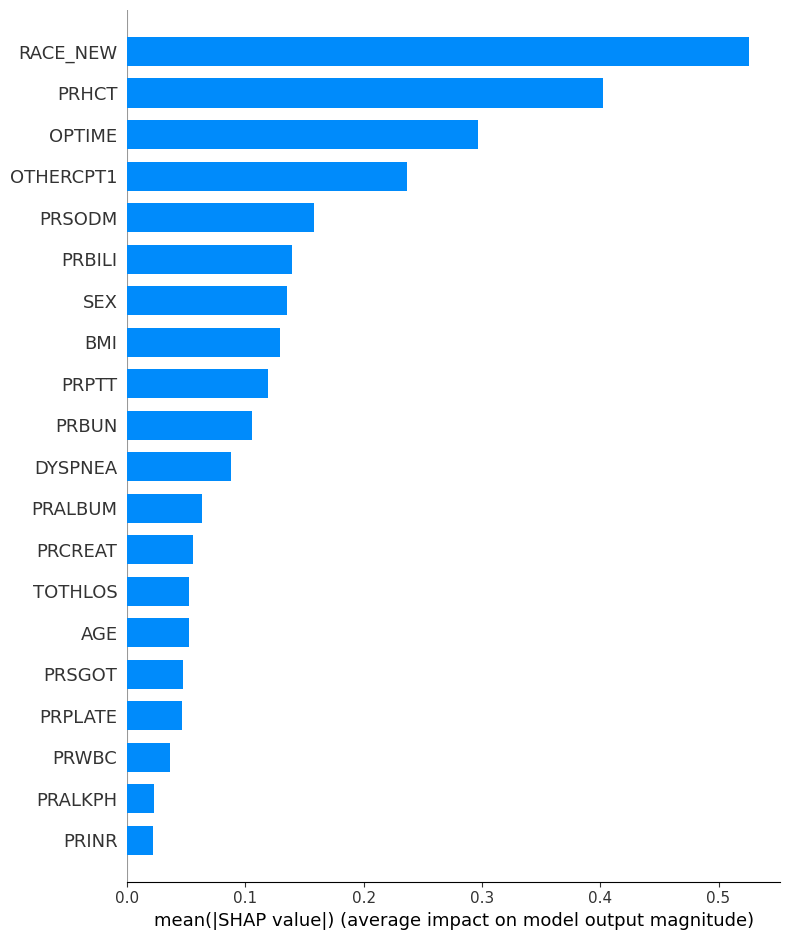

In [8]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

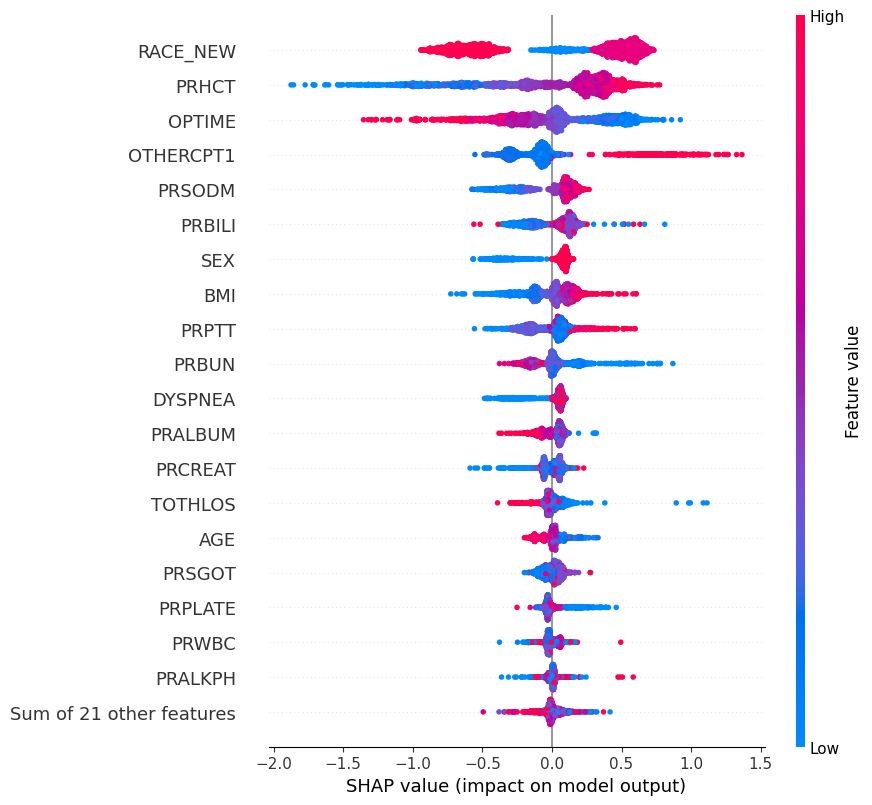

In [10]:
# Beeswarm plot
shap.plots.beeswarm(shap_values, max_display=20)

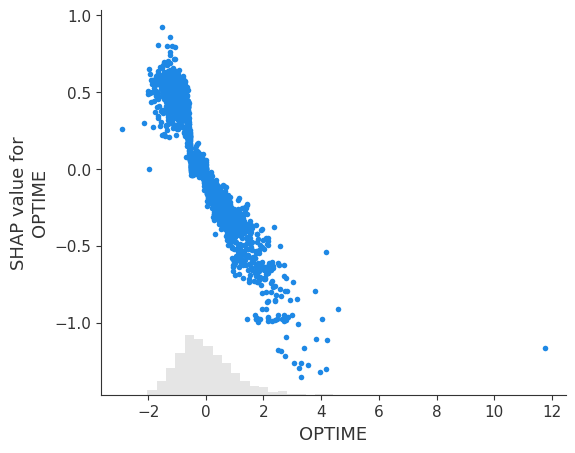

In [11]:
# Dependence plot - 1 feature
shap.plots.scatter(shap_values[:, 'OPTIME'])

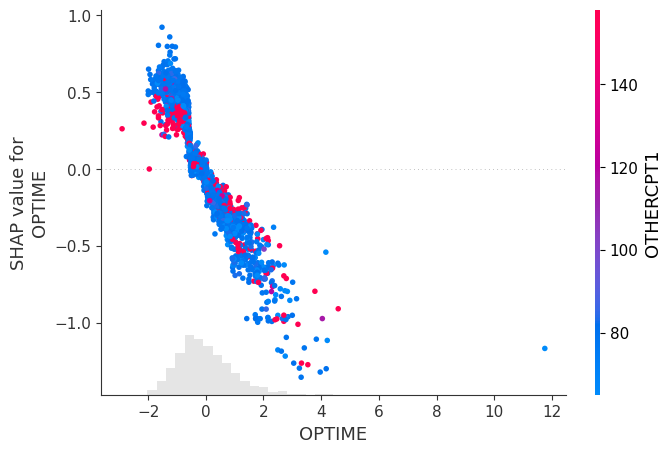

In [12]:
shap.plots.scatter(shap_values[:, "OPTIME"], color=shap_values)

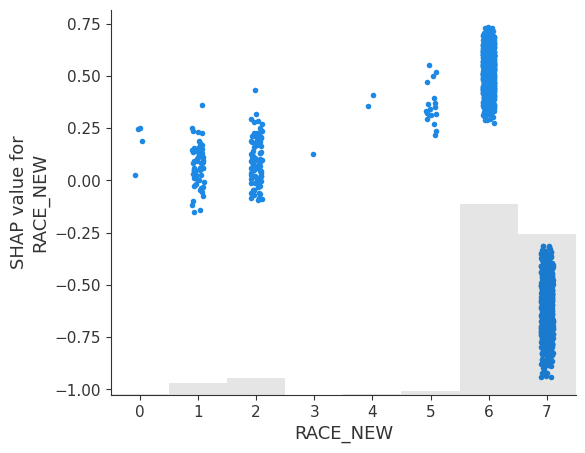

In [13]:
# Dependence plot - 1 feature
shap.plots.scatter(shap_values[:, 'RACE_NEW'])

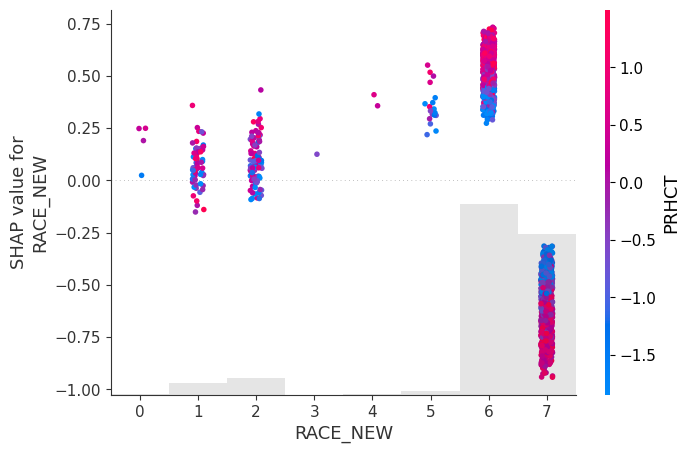

In [14]:
shap.plots.scatter(shap_values[:, "RACE_NEW"], color=shap_values)

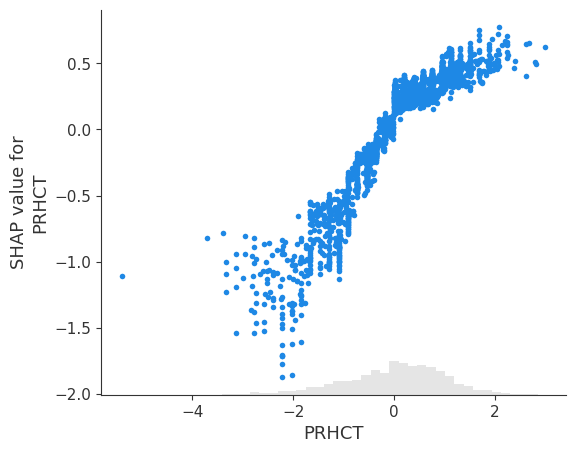

In [15]:
shap.plots.scatter(shap_values[:, 'PRHCT'])

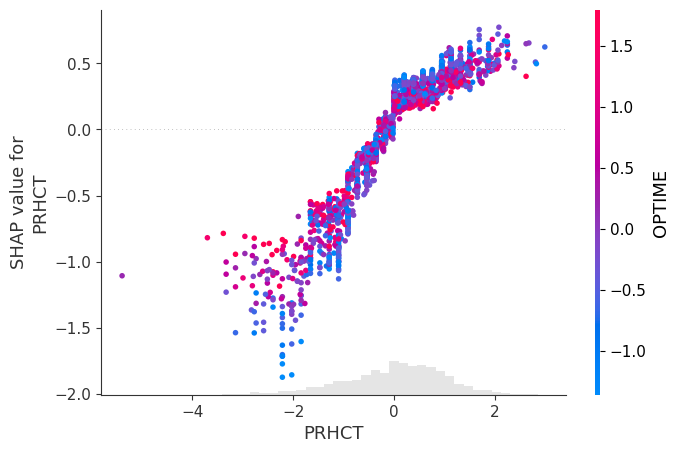

In [16]:
shap.plots.scatter(shap_values[:, "PRHCT"], color=shap_values)

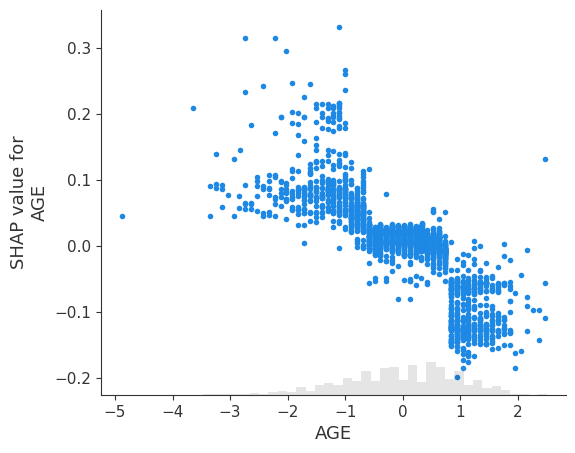

In [17]:
shap.plots.scatter(shap_values[:, 'AGE'])

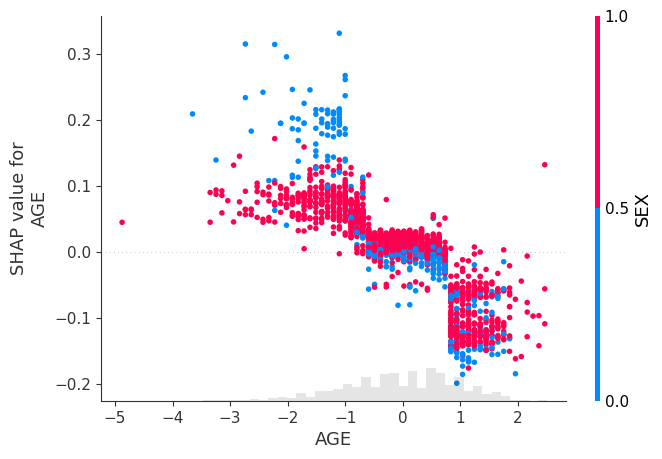

In [18]:
shap.plots.scatter(shap_values[:, "AGE"], color=shap_values)

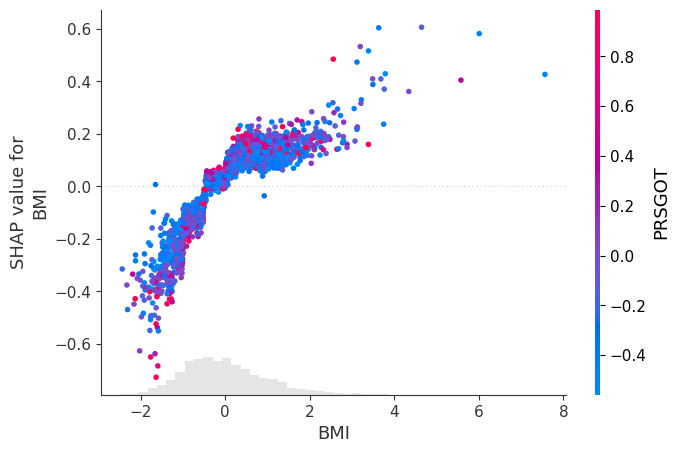

In [19]:
shap.plots.scatter(shap_values[:, "BMI"], color=shap_values)